# Gas-Turbine Emissions Predictions (Regression)

This Dataset consists of 9 continuous predictors, and **2 different response variables**, carbon monoxide (CO) emmission and nitric oxide (NOx) emission, both continuous quantities.

We will explore the data and try different regression models, to find the best one for each dependant (response) variable.

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()


df = pd.read_csv("gt_full.csv")
df = df.drop(columns=["Unnamed: 0"]) #data has a row number column (other than its dataframe id)

df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36733 entries, 0 to 36732
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      36733 non-null  float64
 1   AP      36733 non-null  float64
 2   AH      36733 non-null  float64
 3   AFDP    36733 non-null  float64
 4   GTEP    36733 non-null  float64
 5   TIT     36733 non-null  float64
 6   TAT     36733 non-null  float64
 7   TEY     36733 non-null  float64
 8   CDP     36733 non-null  float64
 9   CO      36733 non-null  float64
 10  NOX     36733 non-null  float64
dtypes: float64(11)
memory usage: 3.1 MB


,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000
mean,17.712726,1013.070165,77.867015,3.925518,25.563801,1081.428084,546.158517,133.506404,12.060525,2.372468,65.293067
std,7.447451,6.463346,14.461355,0.773936,4.195957,17.536373,6.842360,15.618634,1.088795,2.262672,11.678357
min,-6.234800,985.850000,24.085000,2.087400,17.698000,1000.800000,511.040000,100.020000,9.851800,0.000388,25.905000
25%,11.781000,1008.800000,68.188000,3.355600,23.129000,1071.800000,544.720000,124.450000,11.435000,1.182400,57.162000
50%,17.801000,1012.600000,80.470000,3.937700,25.104000,1085.900000,549.880000,133.730000,11.965000,1.713500,63.849000
75%,23.665000,1017.000000,89.376000,4.376900,29.061000,1097.000000,550.040000,144.080000,12.855000,2.842900,71.548000
max,37.103000,1036.600000,100.200000,7.610600,40.716000,1100.900000,550.610000,179.500000,15.159000,44.103000,119.910000


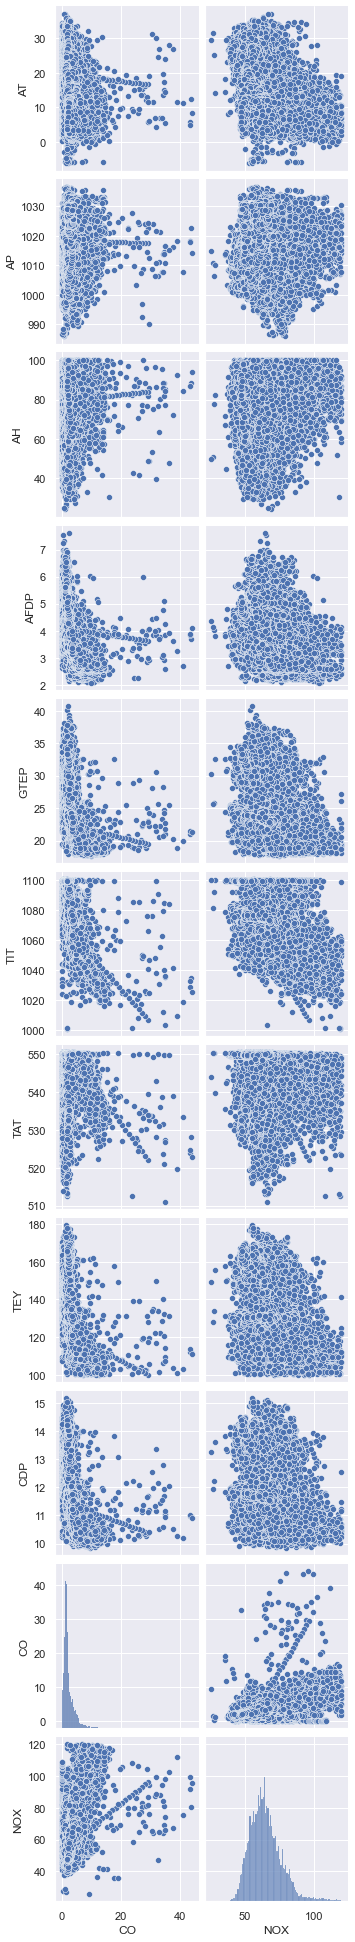

Correlation Matrix: 


,CO,NOX
AT,-0.174326,-0.558174
AP,0.067050,0.191938
AH,0.106586,0.164617
AFDP,-0.448425,-0.188247
GTEP,-0.518909,-0.201630
TIT,-0.706275,-0.213865
TAT,0.058353,-0.092791
TEY,-0.569813,-0.116127
CDP,-0.551027,-0.171256
CO,1.000000,0.340606


In [5]:
sns.pairplot(df, x_vars=["CO", "NOX"])
plt.show()

print("Correlation Matrix: ")
df.corr()[["CO", "NOX"]]

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

y1 = df["CO"]
y2 = df["NOX"]
X = df.drop(columns = ['CO', "NOX"])

def model(model, x, y, model_name):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

    model.fit(X_train, y_train)
    pred_tr = model.predict(X_train)
    pred_te = model.predict(X_test)

    r2_tr = r2_score(y_train, pred_tr)
    r2_te = r2_score(y_test, pred_te)

    mse_tr = mean_squared_error(y_train, pred_tr)
    mse_te = mean_squared_error(y_test, pred_te)
    
    print("=============================================", "\n")
    print(model_name, "to predict", y.name, "\n")
    
    print("r2 score for training set: ", r2_tr)
    print("r2 score for testing set: ", r2_te, "\n")

    print("mean squared error for training set: ", mse_tr)
    print("mean squared error for testing set: ", mse_te, "\n")
    #return pred_te
    
lin = LinearRegression()
rf = RandomForestRegressor()
gb = GradientBoostingRegressor()
net = MLPRegressor(random_state=21)
poly = Pipeline([("poly", PolynomialFeatures(degree=2)), ("regressor", LinearRegression())])

models = [lin, rf, gb, net, poly]
names = ["Linear Regression", "Random Forest", "Gradient Boosting", "MLP Regression (Neural network)",
        "Polynomial Regression (2nd degree)"]
Y = [y1, y2]
for i in range(len(models)):
    for y in Y:
        model(models[i], X, y, names[i])


Linear Regression to predict CO 

r2 score for training set:  0.5620158064899403
r2 score for testing set:  0.5673372055271235 

mean squared error for training set:  2.2253502820526574
mean squared error for testing set:  2.2651932631617977 


Linear Regression to predict NOX 

r2 score for training set:  0.5223543837249878
r2 score for testing set:  0.503491751015686 

mean squared error for training set:  65.58333055115381
mean squared error for testing set:  66.32602604760464 


Random Forest to predict CO 

r2 score for training set:  0.9644851911559336
r2 score for testing set:  0.7738681835983622 

mean squared error for training set:  0.18044689979519618
mean squared error for testing set:  1.1839064362434846 


Random Forest to predict NOX 

r2 score for training set:  0.9820357711446861
r2 score for testing set:  0.8718411077128894 

mean squared error for training set:  2.4665859352015604
mean squared error for testing set:  17.120098297371086 


Gradient Boosting to predic

**We see that the Random Forest model is the best for both predictors**, and performs well.

The gradient boosting (another decision tree model) and polynomial regression models both perform fairly well too.

The MLP does not perform well, which is not unexpected; neural networks can sometimes detect hidden or unseen patterns, but more often perform mediocrely.

Linear Regression doesn't do well either, which is expected, given the low linearity displayed in the pair plot shown above. But I like to always try Linear models, at least for reference (of expected performance).